# Titanic survival EDA

## 1. import libreary

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load the dataset

In [5]:
ta = sns.load_dataset('titanic')
ta.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Analysis of dataset

In [6]:
# get all the columns
ta.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
# total no of columns count
len(ta.columns)

15

In [8]:
# get total no of rows and columns
ta.shape

(891, 15)

In [9]:
# summery of data
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
# get statiscal analysis of the dataset(numerical columns)
ta.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## data preprocessing

### handling null values

In [11]:
ta.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [12]:
# calculate the percentage of null values
null_percentage = (ta.isnull().sum() / len(ta)) * 100

# round the percentage to 2 decimal places and sort in descending order
null_percentage_sorted = null_percentage.round(2).sort_values(ascending=False)

null_percentage_sorted

,0
deck,77.22
age,19.87
embarked,0.22
embark_town,0.22
sex,0.00
pclass,0.00
survived,0.00
fare,0.00
parch,0.00
sibsp,0.00


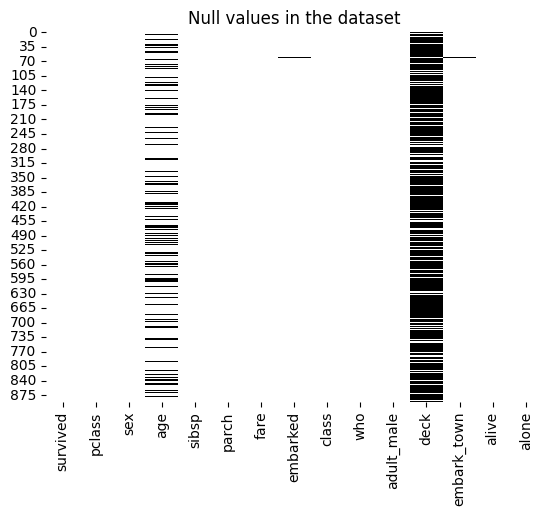

In [13]:
# visualized the null values
sns.heatmap(ta.isnull(), cbar=False, cmap='gray_r')
plt.title('Null values in the dataset')
plt.show()

 Different ways to handle Null Values

--> If the null values in a column are very less then we can drop those rows.

--> if the null values in a column are high--> if data is continuous and outliers are present --> Median

--> if data is continuous and outliers are not present --> Mean

--> if data is categorical data --> Mode

In [14]:
ta.dropna(subset=['embarked', 'embark_town'], axis=0, inplace=True)
ta.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


### checking outlier

In [15]:
ta['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [16]:
# Fill NaN values in the 'deck' column with the mode
ta['deck'] = ta['deck'].fillna(ta['deck'].mode()[0])

# Check if there are any remaining null values in the 'deck' column
print(ta['deck'].isnull().sum())

0


In [17]:
ta.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


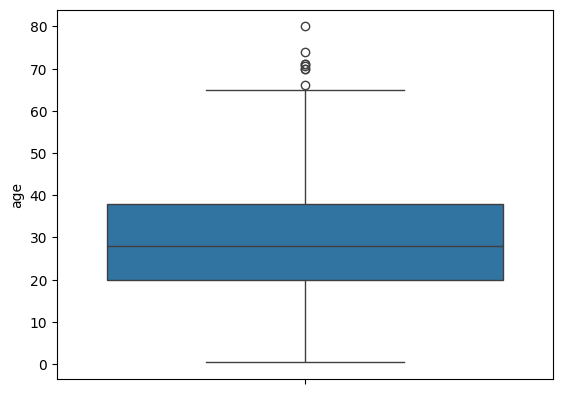

In [18]:
# checking outlier of age
sns.boxplot(ta['age'])
plt.show()


In [19]:
# replace null value using median
ta['age'] = ta['age'].fillna(ta['age'].median())
ta.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


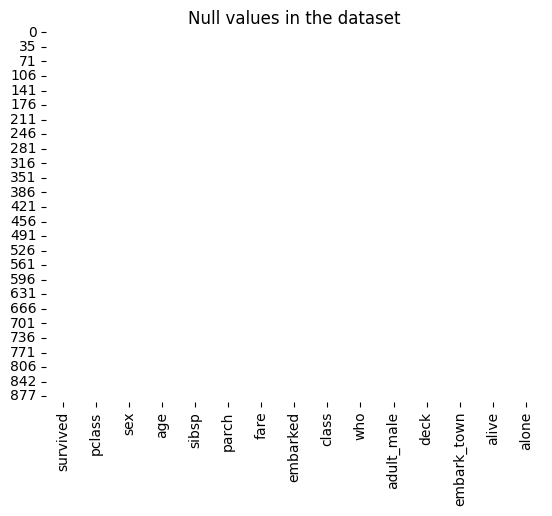

In [20]:
# visualize the data
sns.heatmap(ta.isnull(), cbar=False, cmap='gray_r')
plt.title('Null values in the dataset')
plt.show()

### Handling duplicate

In [21]:
ta.duplicated().sum()

np.int64(112)

In [22]:
# drop_duplicate rows
ta.drop_duplicates(inplace=True)
ta.duplicated().sum()

np.int64(0)

### checking datatypes and type casting

In [23]:
ta.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


## data visulaization

### 1. 	Create a stacked bar chart showing the proportion of **survivors and non-survivors for each passenger class**. Use a color palette that is visually appealing and ensure that the bars are labeled with the corresponding passenger class.

In [24]:
class_servival = ta.groupby(['pclass', 'survived']).size()
print(class_servival)
class_servival = ta.groupby(['pclass', 'survived']).size().unstack()
print(class_servival)

pclass  survived
1       0            78
        1           132
2       0            81
        1            84
3       0           298
        1           104
dtype: int64
survived    0    1
pclass            
1          78  132
2          81   84
3         298  104


<Figure size 800x600 with 0 Axes>

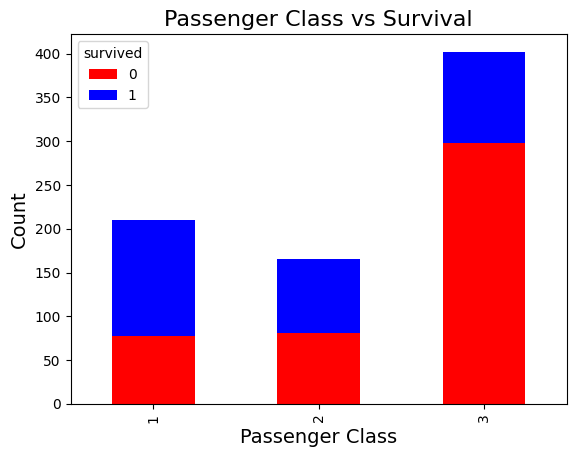

In [25]:
class_servival = ta.groupby(['pclass', 'survived']).size().unstack()
plt.figure(figsize=(8,6))
class_servival.plot(kind='bar', stacked=True, color=['r','b'])
plt.title('Passenger Class vs Survival',fontsize=16)
plt.xlabel('Passenger Class',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

### 	Create a pie chart showing the **proportion of male and female passengers**on the Titanic. Use a color palette that is visually appealing and ensure that the slices of the pie chart are labeled with the corresponding gender.

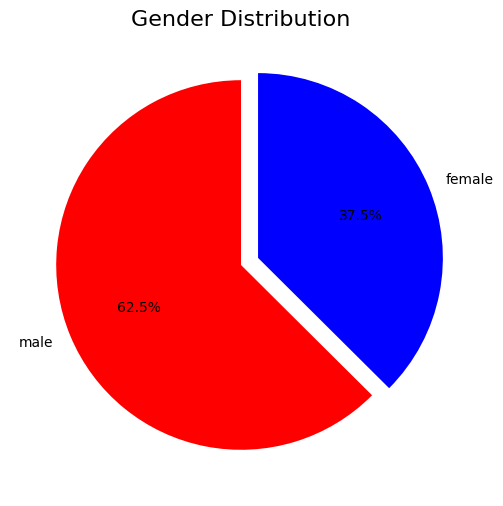

In [26]:
gender_count = ta['sex'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=['r','b'], explode=(0,0.1))
plt.title('Gender Distribution',fontsize=16)
plt.show()

### 	Create a histogram showing the **distribution of passenger ages**. Use a color palette that is visually appealing and ensure that the **x-axis is labelled with age ranges.**

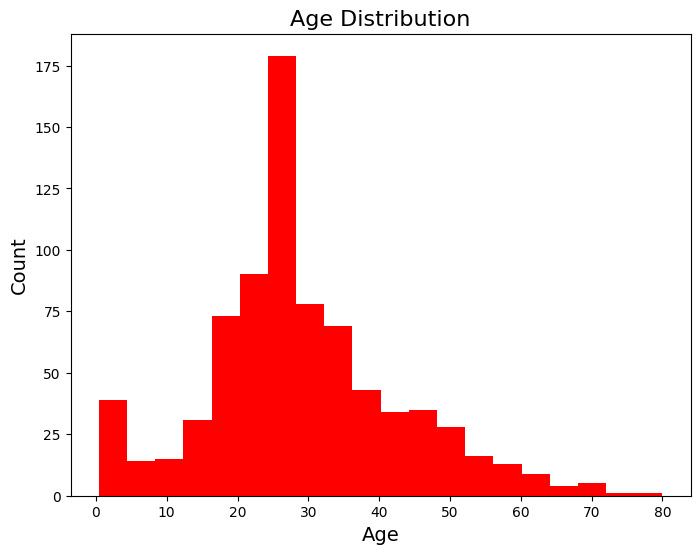

In [27]:
plt.figure(figsize=(8,6))
plt.hist(ta['age'], bins=20, color='r')
plt.title('Age Distribution',fontsize=16)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

### 	Create a scatter plot showing the **relationship between passenger age and fare paid.** Use different colors for **passengers who survived and did not survive** and label the axes and legend appropriately.

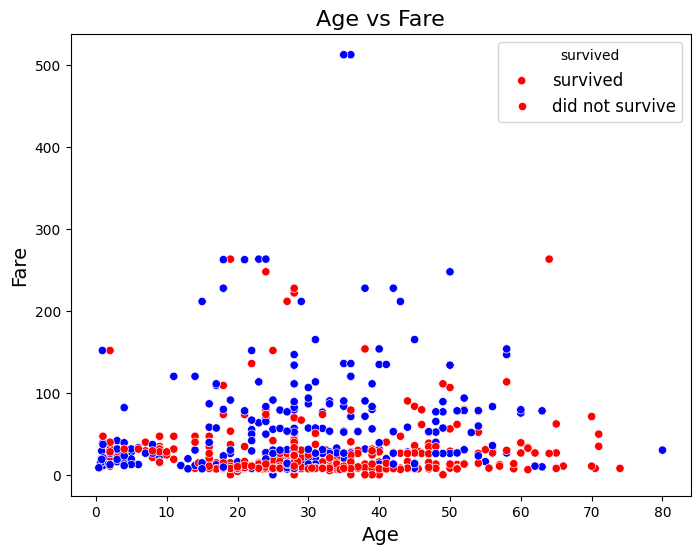

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='fare', data=ta, hue='survived', palette=['r','b'])
plt.title('Age vs Fare',fontsize=16)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Fare',fontsize=14)

plt.legend(title= 'survived', labels=['survived','did not survive'], fontsize=12)
plt.show()

### 	Create a **bar chart** showing the **number of passengers in each age range who survived or did not survive**. Use a color palette that is visually appealing and ensure that the bars are labelled with the corresponding survival status.

/tmp/ipython-input-29-942766210.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_servival = ta.groupby(['age_range', 'survived']).size().unstack()


<Figure size 800x600 with 0 Axes>

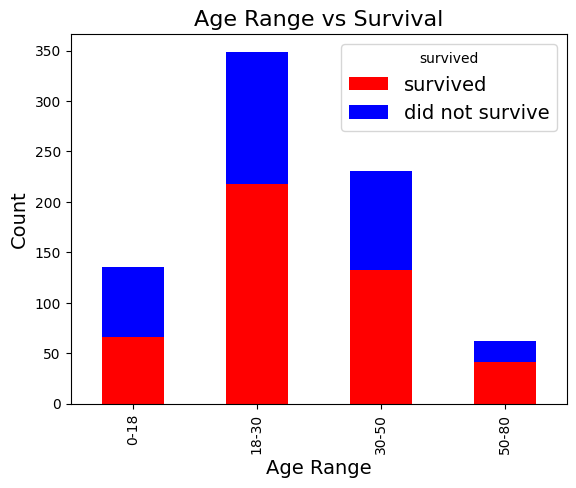

In [29]:
ta['age_range'] = pd.cut(ta['age'], bins=[0, 18, 30, 50, 80], labels=['0-18', '18-30', '30-50', '50-80'])
age_servival = ta.groupby(['age_range', 'survived']).size().unstack()
plt.figure(figsize=(8,6))
age_servival.plot(kind='bar', stacked=True, color=['r','b'])
plt.title('Age Range vs Survival',fontsize=16)
plt.xlabel('Age Range',fontsize=14)
plt.ylabel('Count',fontsize=14)

plt.legend(title= 'survived', labels=['survived','did not survive'], fontsize=14)
plt.show()

### boxplot of fare distribution across passenger classes


/tmp/ipython-input-30-3140634167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=ta, palette='Set2')


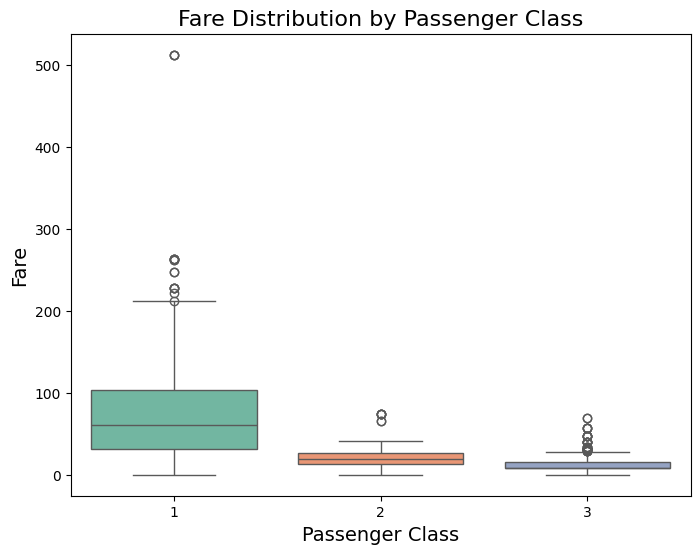

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x='pclass', y='fare', data=ta, palette='Set2')
plt.title('Fare Distribution by Passenger Class',fontsize=16)
plt.xlabel('Passenger Class',fontsize=14)
plt.ylabel('Fare',fontsize=14)
plt.show()

### heatmap od correlations between numerical features

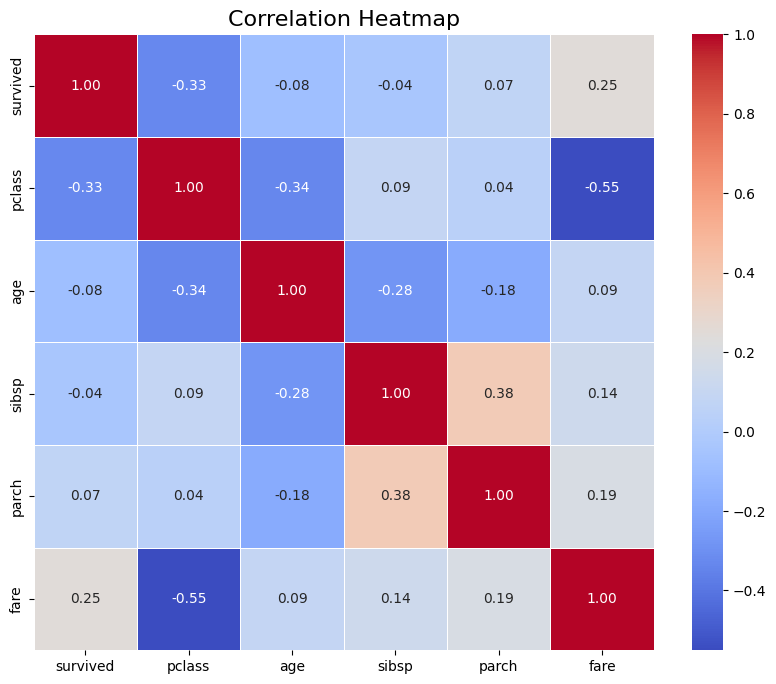

In [31]:
numerical_columns = ta.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = ta[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap',fontsize=16)
plt.show()